<a href="https://colab.research.google.com/github/crdguez/mat4ac/blob/master/notebooks/est_evaluacion_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Si lo ejecutas desde google colab
from google.colab import drive
import os
drive.mount('/content/drive')
%cd /content/drive/My Drive/Curso\ Actual/4ac/notebooks
!pwd
#os.chdir('/content/drive/Curso Actual')



ModuleNotFoundError: No module named 'google.colab'

In [1]:
# Importamos librerías
#from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import pandas as pd #this is how I usually import pandas
#import matplotlib #only needed to determine Matplotlib version number
import numpy as np

# Enable inline plotting
%matplotlib inline



import imgkit

# Función para analizar un dataframe

def analisis_df(df, txt_intro ="Tenemos los siguientes datos: \n " \
                ,txt_mejor="\n * Sube {}:", txt_peor="\n * **Baja** {}:", \
                txt_igual="\n * Se mantiene {}:", solo_diferencias=False, \
                modo=1) :
    # analiza los datos de un dataframe donde en el indice están las evaluaciones y en las columnas los items a analizar
    if max(df.index)  > 1 :
        ix = list(df.index).index(ultima_evaluacion)
        txt = txt_intro
        for c in range(len(df.columns)) :
            if (df.iloc[ix,c] - df.iloc[ix-1,c]) > 0 : txt2 = txt_mejor.format(df[df.columns[c]].name)+" Pasa de {} a {}. ".format(str(df.iloc[ix-1,c]),str(df.iloc[ix,c]))
            elif (df.iloc[ix,c] - df.iloc[ix-1,c]) < 0 : txt2 = txt_peor.format(df[df.columns[c]].name)+" Pasa de {} a {}. ".format(str(df.iloc[ix-1,c]),str(df.iloc[ix,c]))
            elif (solo_diferencias) : txt2=""
            else : txt2 = txt_igual.format(df[df.columns[c]].name)+" {}. ".format(str(df.iloc[ix,c]))              
            txt += txt2        
    else :
        txt = txt_intro
        if modo ==1 :
            txt += ", ".join(["**{}** es {}".format(df[df.columns[c]].name,str(df.iloc[0,c])) for c in range(len(df.columns))])
        elif modo == 2 :
            txt += " ".join(["\n* **{}**: {}".format(df[df.columns[c]].name,str(df.iloc[0,c])) for c in range(len(df.columns))])+" \n "
        else :
            txt += ", ".join(["**{}**: {}".format(df[df.columns[c]].name,str(df.iloc[0,c])) for c in range(len(df.columns))])+" \n "
    return txt+" \n ", [df[df.columns[i]] for i in range(len(df.columns))]
    


# Funciones para estilo

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        color = 'red; background: khaki' if (val < 5 or val =="") else 'green; background: lightyellow'
    return 'color: %s ; font-size: 20px ; font-weight: bold' % color 

def color_media(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        color = 'red; background: gold' if (val < 5 or val =="") else 'black; background: burlywood'
    return 'color: %s ; font-size: 14px ; font-weight: bold'  % color 

def color_suspensos(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        color = 'red; background: gold' if (val > 0 or val =="") else 'black; background: darkkhaki'
        
    return 'color: %s ; font-weight: bold ; font-size: 14px' % color 

def evaluaciones_anteriores(val):      
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        #color = 'red; background: khaki' if (val < 5 or val =="") else 'green; background: ghostwhite'
        color = 'blue ; background: azure'
    
    return 'color: %s ; font-size: 16px ; font-weight: bold' % color 

In [62]:
# Importamos los datos

evaluaciones_a_incluir = 1

inicio_nombre_fichero = 'importado'

def actilla(fich='importado2', eval=2):
    fichero = fich + '.csv'
    pre_actilla = pd.read_csv(fichero, index_col=False, encoding='utf-8')
    pre_actilla = pre_actilla.drop([col for col in pre_actilla if col.startswith('Unna')], axis=1)
    pre_actilla = pre_actilla.drop("Nº MNS", axis = 1)
    pre_actilla = pd.melt(pre_actilla, id_vars=["Nº","Apellidos, Nombre"], var_name="Asignatura", value_name="Nota")
    pre_actilla = pre_actilla[pre_actilla['Nota'].notna()]
    pre_actilla = pre_actilla.copy()
    pre_actilla['Eval'] = eval
    pre_actilla.Asignatura=pre_actilla.Asignatura.str.replace('\n', ' ')
    return pre_actilla
    

def concatenar_actillas(inicio_nombre_fichero='importado', evaluaciones_a_incluir=2): 
    return pd.concat([actilla(inicio_nombre_fichero + str(n + 1), n + 1) for n in range(evaluaciones_a_incluir)])

actilla_final = concatenar_actillas(inicio_nombre_fichero,evaluaciones_a_incluir)
actilla_final = actilla_final.rename(columns={'Apellidos, Nombre':'Alumno'})
actilla_final = actilla_final[['Alumno','Asignatura','Eval','Nota']]
actilla_final['Suspenso']=0

# Si sale algún no presentado hay que ejecutar lo siguiente
#actilla_final = actilla_final.drop(actilla_final[actilla_final.Nota == 'NP'].index)

actilla_final.Nota = pd.to_numeric(actilla_final.Nota)
actilla_final.loc[actilla_final['Nota'] < 5, 'Suspenso'] = 1
actilla_final.Nota = actilla_final.Nota.astype(int)

ultima_evaluacion = actilla_final.Eval.max()


actilla_final=actilla_final[actilla_final.Eval <= evaluaciones_a_incluir].sort_values('Alumno', ascending=True)
actilla_final.to_csv('ev{}.csv'.format(evaluaciones_a_incluir),index=False)
actilla_final

,Alumno,Asignatura,Eval,Nota,Suspenso
405,"Aparicio Maella, Ángel",LE 4º,1,4,1
162,"Aparicio Maella, Ángel",EF 4º,1,6,0
297,"Aparicio Maella, Ángel",GH 4º,1,5,0
351,"Aparicio Maella, Ángel",IN 4º,1,6,0
108,"Aparicio Maella, Ángel",EC 4º,1,5,0
...,...,...,...,...,...
296,"Zueras Martínez, Marta",FR2 4º,1,9,0
269,"Zueras Martínez, Marta",FQB 4º,1,8,0
188,"Zueras Martínez, Marta",EF 4º,1,9,0
26,"Zueras Martínez, Marta",ARE 4º,1,8,0


In [63]:
actilla_final[['Alumno','Asignatura']].groupby('Alumno').count().sort_values(['Alumno']).rename(columns={'Asignatura':'Observaciones'}).to_csv("alumnos_observaciones_n.csv",encoding='utf_8')

obser = pd.read_csv('alumnos_observaciones_n.csv', index_col=False)
obser = obser[obser.Observaciones.notna()]
obser

,Alumno,Observaciones
0,"Aparicio Maella, Ángel",10
1,"Arcas Sánchez, Daniel",10
2,"Cabeza Roche, Andrea",10
3,"Campo García, Paula",10
4,"Damasceno Ossó, Óscar",10
5,"Doncheva Mavrova, Teodora",10
6,"Escanero Agustín, Sergio",10
7,"Espinosa Pérez, David",10
8,"Esteban Muñoz, Cora",10
9,"Fatás Cantín, Marta",10


In [64]:
import unidecode
actilla_final[['Alumno','Asignatura']].groupby('Alumno').count().sort_values(by='Alumno', key=lambda col: [unidecode.unidecode(i) for i in col]).rename(columns={'Asignatura':'Observaciones'})

,Observaciones
Alumno,
"Aparicio Maella, Ángel",10
"Arcas Sánchez, Daniel",10
"Cabeza Roche, Andrea",10
"Campo García, Paula",10
"Damasceno Ossó, Óscar",10
"Doncheva Mavrova, Teodora",10
"Escanero Agustín, Sergio",10
"Espinosa Pérez, David",10
"Esteban Muñoz, Cora",10


In [65]:
#actilla_final[['Alumno','Asignatura']].groupby('Alumno').count().rename(columns={'Asignatura':'Observaciones'}).to_csv("alumnos_observaciones.csv",encoding='utf-8')


# Tiene que existir el fichero

obser = pd.read_csv('alumnos_observaciones{}.csv'.format(ultima_evaluacion), index_col=False)
obser = obser[obser.Observaciones.notna()]
obser

,Alumno,Observaciones
0,"Aparicio Maella, Ángel","Alumno poco trabajador, y además justo. No se ..."
1,"Arcas Sánchez, Daniel",Alumno con muchas dificultades que ha rechazad...
2,"Cabeza Roche, Andrea","Si mejora el trabajo en casa, posiblemente mej..."
3,"Campo García, Paula",Bastante trabajadora. En algunas asignaturas p...
4,"Damasceno Ossó, Óscar","Ha trabajado más o menos bien, pero no se pued..."
5,"Doncheva Mavrova, Teodora",Falta de trabajo sobre todo en casa. Debe cuid...
6,"Escanero Agustín, Sergio",Tiene que trabajar más si no quiere tener prob...
7,"Espinosa Pérez, David","Alumno capaz, pero con falta de trabajo. Piens..."
8,"Esteban Muñoz, Cora",Buena actitud y trabajo. Parece que va ganando...
9,"Fatás Cantín, Marta",Alumna participativa. En ocasiones tiene altib...


In [66]:
###### Informe sábana (df5 y actilla_estilada)


#df = actilla_final[actilla_final.Eval <= ultima_evaluacion]
df = actilla_final[actilla_final.Eval.isin([ultima_evaluacion, ultima_evaluacion -1])]

df1 = df.set_index(['Alumno','Asignatura','Eval']).Nota.astype(int).unstack('Asignatura').unstack('Eval').sort_values(by='Alumno', key=lambda col: [unidecode.unidecode(i) for i in col])
df2=actilla_final[actilla_final.Eval == ultima_evaluacion].groupby(['Alumno','Eval'])[['Nota']].mean().unstack('Eval').sort_values(by='Alumno', key=lambda col: [unidecode.unidecode(i) for i in col]).rename(columns={'Nota':'NM'})
df3 = df.groupby(['Asignatura','Eval'])[['Nota']].mean()

df4 = pd.concat([df1,df3.T.rename(index={'Nota': 'Media'})])

# #calculamos el número de suspensos por asignatura y porcentaje

df7=df.groupby(['Asignatura','Eval'])[['Suspenso']].aggregate(['sum','count'])
df7[('Suspenso','porc')]=df7[('Suspenso','sum')]/df7[('Suspenso','count')]
df7.columns=df7.columns.get_level_values(1)
df7.T

df4 = pd.concat([df4,df7[['sum','porc']].T.rename(index={'sum':'nsusp','porc':'%'})], sort=False)

df5 = pd.concat([df4,df2], axis=1, sort=False)
df6 = actilla_final[actilla_final.Eval == ultima_evaluacion].groupby(['Alumno','Eval'])[['Suspenso']].sum().unstack('Eval').sort_values(by='Alumno', key=lambda col: [unidecode.unidecode(i) for i in col]).rename(columns={'Suspenso':'MNS'})
df5 = pd.concat([df5,df6], axis=1, sort=False)


# # calculamos la media de las medias de las notas y la suma total de suspensos
df5.iloc[-3:-2,-2:-1]=df2.mean()[0]
df5.iloc[-2:-1,-1:]=df6.sum()[0]

# le damos estilo

actilla_estilada = df5.style.set_precision(0) \
    .format("{:.0%}",subset=(df5.index[-1:],df5.columns[:-2])) \
    .format("{:.0f}",subset=(df5.index[-2:-1],df5.columns[:-2])) \
    .format("{:.1f}",subset=(df5.index[-3:-2],df5.columns[:-2])) \
    .format("{:.1f}",subset=(df5.index,df5.columns[-2:-1])) \
    .format("{:.0f}",subset=(df5.index,df5.columns[-1:0])) \
    .set_table_styles([{'selector': 'td','props': [('border', '1px solid black'),('text-align', 'center')]}, \
                       {'selector': 'tr','props': [('border', '1px solid black')]}, \
                       {'selector': 'th','props': [('border', '1px solid black'),('text-align', 'center'),('font-size','13px')]}, \
                      ] \
                     ) \
    .applymap(color_negative_red, subset=(df5.index[:-3],df5.columns[:-2])).highlight_null("white") \
    .applymap(color_media, subset=(df5.index[-3:-2],df5.columns)) \
    .applymap(evaluaciones_anteriores, subset=(df5.index[-2:],df5.columns[:])) \
    .applymap(color_media, subset=(df5.index[:-3],['NM'])) \
    .applymap(color_suspensos, subset=(df5.index[:-3],['MNS'])) \
    .applymap(evaluaciones_anteriores, subset=(df5.index,df5.columns[df5.columns.get_level_values(1) != ultima_evaluacion])) \
    .set_na_rep('-')
df5

#                      {'selector': 'th','props': [('border', '1px solid black'),('text-align', 'center'),('font-size','20px')]}
 
#    .set_table_styles([{'selector': 'td','props': [('border-collapse', 'collapse'),('text-align', 'center')]}, \

#     .applymap(color_media, subset=(df5.index,['NM'])) \
#     .applymap(color_suspensos, subset=(df5.index,['MNS'])) \
#     .applymap(color_media, subset=(df5.index[-3:-2],df5.columns[:-2])) \
#     .applymap(color_suspensos, subset=(df5.index[-2:-2],df5.columns[:-2])) \
#     .applymap(evaluaciones_anteriores, subset=(df5.index[-3:],df5.columns[df5.columns.get_level_values(1) != ultima_evaluacion])) \



df1

Asignatura,ARE 4º,BG 4º,CC 4º,CCL 4º,EC 4º,ECB 4º,EF 4º,FIL 4º,FQ 4º,FQB 4º,...,IN 4º,INB 4º,LE 4º,MC 4º,MU 4º,PL 4º,RC 4º,TC 4º,TIC 4º,VET 4º
Eval,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Alumno,,,,,,,,,,,,,,,,,,,,,
"Aparicio Maella, Ángel",NaN,NaN,NaN,NaN,5.0,NaN,6.0,NaN,4.0,NaN,...,6.0,NaN,4.0,5.0,NaN,NaN,NaN,4.0,4.0,9.0
"Arcas Sánchez, Daniel",NaN,NaN,NaN,4.0,5.0,NaN,7.0,NaN,3.0,NaN,...,3.0,NaN,3.0,2.0,NaN,NaN,NaN,5.0,NaN,8.0
"Cabeza Roche, Andrea",8.0,9.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,6.0,...,NaN,7.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,8.0
"Campo García, Paula",8.0,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,8.0,...,NaN,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,8.0
"Damasceno Ossó, Óscar",NaN,NaN,NaN,NaN,8.0,NaN,5.0,NaN,6.0,NaN,...,6.0,NaN,6.0,5.0,NaN,7.0,6.0,NaN,4.0,NaN
"Doncheva Mavrova, Teodora",NaN,7.0,8.0,NaN,NaN,NaN,7.0,NaN,NaN,8.0,...,NaN,9.0,6.0,4.0,9.0,NaN,NaN,NaN,NaN,8.0
"Escanero Agustín, Sergio",NaN,4.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,6.0,...,NaN,6.0,4.0,4.0,8.0,NaN,8.0,NaN,3.0,NaN
"Espinosa Pérez, David",NaN,NaN,NaN,NaN,NaN,9.0,8.0,NaN,5.0,NaN,...,NaN,7.0,5.0,5.0,NaN,NaN,NaN,7.0,7.0,8.0


In [67]:
df = actilla_final[actilla_final.Eval.isin([ultima_evaluacion, ultima_evaluacion -1])]
df1 = df.set_index(['Alumno','Asignatura','Eval']).Nota.astype(int).unstack('Asignatura').unstack('Eval').sort_values(by='Alumno', key=lambda col: [unidecode.unidecode(i) for i in col])
df1

Asignatura,ARE 4º,BG 4º,CC 4º,CCL 4º,EC 4º,ECB 4º,EF 4º,FIL 4º,FQ 4º,FQB 4º,...,IN 4º,INB 4º,LE 4º,MC 4º,MU 4º,PL 4º,RC 4º,TC 4º,TIC 4º,VET 4º
Eval,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Alumno,,,,,,,,,,,,,,,,,,,,,
"Aparicio Maella, Ángel",NaN,NaN,NaN,NaN,5.0,NaN,6.0,NaN,4.0,NaN,...,6.0,NaN,4.0,5.0,NaN,NaN,NaN,4.0,4.0,9.0
"Arcas Sánchez, Daniel",NaN,NaN,NaN,4.0,5.0,NaN,7.0,NaN,3.0,NaN,...,3.0,NaN,3.0,2.0,NaN,NaN,NaN,5.0,NaN,8.0
"Cabeza Roche, Andrea",8.0,9.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,6.0,...,NaN,7.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,8.0
"Campo García, Paula",8.0,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,8.0,...,NaN,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,8.0
"Damasceno Ossó, Óscar",NaN,NaN,NaN,NaN,8.0,NaN,5.0,NaN,6.0,NaN,...,6.0,NaN,6.0,5.0,NaN,7.0,6.0,NaN,4.0,NaN
"Doncheva Mavrova, Teodora",NaN,7.0,8.0,NaN,NaN,NaN,7.0,NaN,NaN,8.0,...,NaN,9.0,6.0,4.0,9.0,NaN,NaN,NaN,NaN,8.0
"Escanero Agustín, Sergio",NaN,4.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,6.0,...,NaN,6.0,4.0,4.0,8.0,NaN,8.0,NaN,3.0,NaN
"Espinosa Pérez, David",NaN,NaN,NaN,NaN,NaN,9.0,8.0,NaN,5.0,NaN,...,NaN,7.0,5.0,5.0,NaN,NaN,NaN,7.0,7.0,8.0


In [68]:
# actilla estilada a fichero html
html='<meta charset="UTF-8">'+actilla_estilada.render()
f=open('actilla_{}ªev.html'.format(ultima_evaluacion),'w')
f.write(html)
f.close()

# actilla estilada a imagen

imgkit.from_string('<meta charset="UTF-8">'+actilla_estilada.render(),'actilla_{}ev.svg'.format(ultima_evaluacion), options = {'format':'svg','zoom':'0.4'})
imgkit.from_string('<meta charset="UTF-8">'+actilla_estilada.render(),'actilla_{}ev.png'.format(ultima_evaluacion), options = {'format':'png','zoom':'0.8'})

actilla_estilada

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


Asignatura,ARE 4º,BG 4º,CC 4º,CCL 4º,EC 4º,ECB 4º,EF 4º,FIL 4º,FQ 4º,FQB 4º,FR2 4º,GH 4º,GHB 4º,IN 4º,INB 4º,LE 4º,MC 4º,MU 4º,PL 4º,RC 4º,TC 4º,TIC 4º,VET 4º,NM,MNS
Eval,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Aparicio Maella, Ángel",-,-,-,-,5,-,6,-,4,-,-,5,-,6,-,4,5,-,-,-,4,4,9,5.2,4
"Arcas Sánchez, Daniel",-,-,-,4,5,-,7,-,3,-,-,2,-,3,-,3,2,-,-,-,5,-,8,4.2,6
"Cabeza Roche, Andrea",8,9,-,-,-,-,8,-,-,6,7,-,4,-,7,7,6,-,-,-,-,-,8,7.0,1
"Campo García, Paula",8,7,-,-,-,-,8,-,-,8,8,-,8,-,8,8,6,-,-,-,-,-,8,7.7,0
"Damasceno Ossó, Óscar",-,-,-,-,8,-,5,-,6,-,-,6,-,6,-,6,5,-,7,6,-,4,-,5.9,1
"Doncheva Mavrova, Teodora",-,7,8,-,-,-,7,-,-,8,-,-,4,-,9,6,4,9,-,-,-,-,8,7.0,2
"Escanero Agustín, Sergio",-,4,-,-,-,-,7,-,-,6,-,-,4,-,6,4,4,8,-,8,-,3,-,5.4,5
"Espinosa Pérez, David",-,-,-,-,-,9,8,-,5,-,-,-,5,-,7,5,5,-,-,-,7,7,8,6.6,0
"Esteban Muñoz, Cora",-,-,-,-,-,6,6,-,7,-,-,-,7,-,8,7,5,-,-,-,7,7,8,6.8,0


In [69]:
au = "IES Pedro Cerrada"
da = "4ºESO B"
f = open("acta_{}ev.md".format(ultima_evaluacion), "w")
texto = """---
title: "Acta de la {}ª evaluación" 
author: {}
date: {}
titlepage: true
logo: headerright
geometry: landscape,margin=1in
keywords: [Acta]
... \n""".format(ultima_evaluacion, au, da)

texto += "# Acta de la {}ª evaluación \n\n \\newpage![](actilla_{}ev.png) \n\n## Resultados generales: \n".format(ultima_evaluacion, ultima_evaluacion)

f3 = open("acta2_{}ev.md".format(ultima_evaluacion), "w")



f2 = open("resumen_{}ev.md".format(ultima_evaluacion), "w")
texto2 = """---
title: "Estadísticas {}ªev." 
author: {}
date: {}
titlepage: true
logo: headerright
geometry: margin=1in, landscape
keywords: [Resumen]
...\n""".format(ultima_evaluacion, au, da)

In [70]:
df = actilla_final.groupby(['Eval'])[['Alumno','Nota','Suspenso']].aggregate({'Alumno':'nunique','Nota':'mean','Suspenso':'sum'}).rename(columns={'Alumno':'N_al', 'Nota':'Media', 'Suspenso':'N_susp'})
df['Susp_alu']=(df['N_susp']/df['N_al']).round(2)
df['Media']=df['Media'].round(2)
display(df)

df2 = df.rename(columns={'N_al':'número de alumnos', 'Media':'nota media', 'N_susp':'número de suspensos','Susp_alu':'número de suspensos por alumno'}).iloc[:,1:]
display(df2)

#texto += "\n\n### Resumen \n"
#texto += "\n  {}  \n".format(df.to_markdown())
texto += analisis_df(df2, txt_intro ="A nivel de grupo, se tienen los siguientes datos: \n ", modo=2)[0] 
texto2 += analisis_df(df2, txt_intro ="A nivel de grupo, se tienen los siguientes datos: \n ", modo=2)[0] 

analisis_df(df2,txt_intro="A nivel de grupo, se tienen los siguientes datos: \n ", modo=2)[0]

#analisis_df??

,N_al,Media,N_susp,Susp_alu
Eval,,,,
1,27,7.24,28,1.04


,nota media,número de suspensos,número de suspensos por alumno
Eval,,,
1,7.24,28,1.04


'A nivel de grupo, se tienen los siguientes datos: \n \n* **nota media**: 7.24 \n* **número de suspensos**: 28 \n* **número de suspensos por alumno**: 1.04 \n  \n '

''

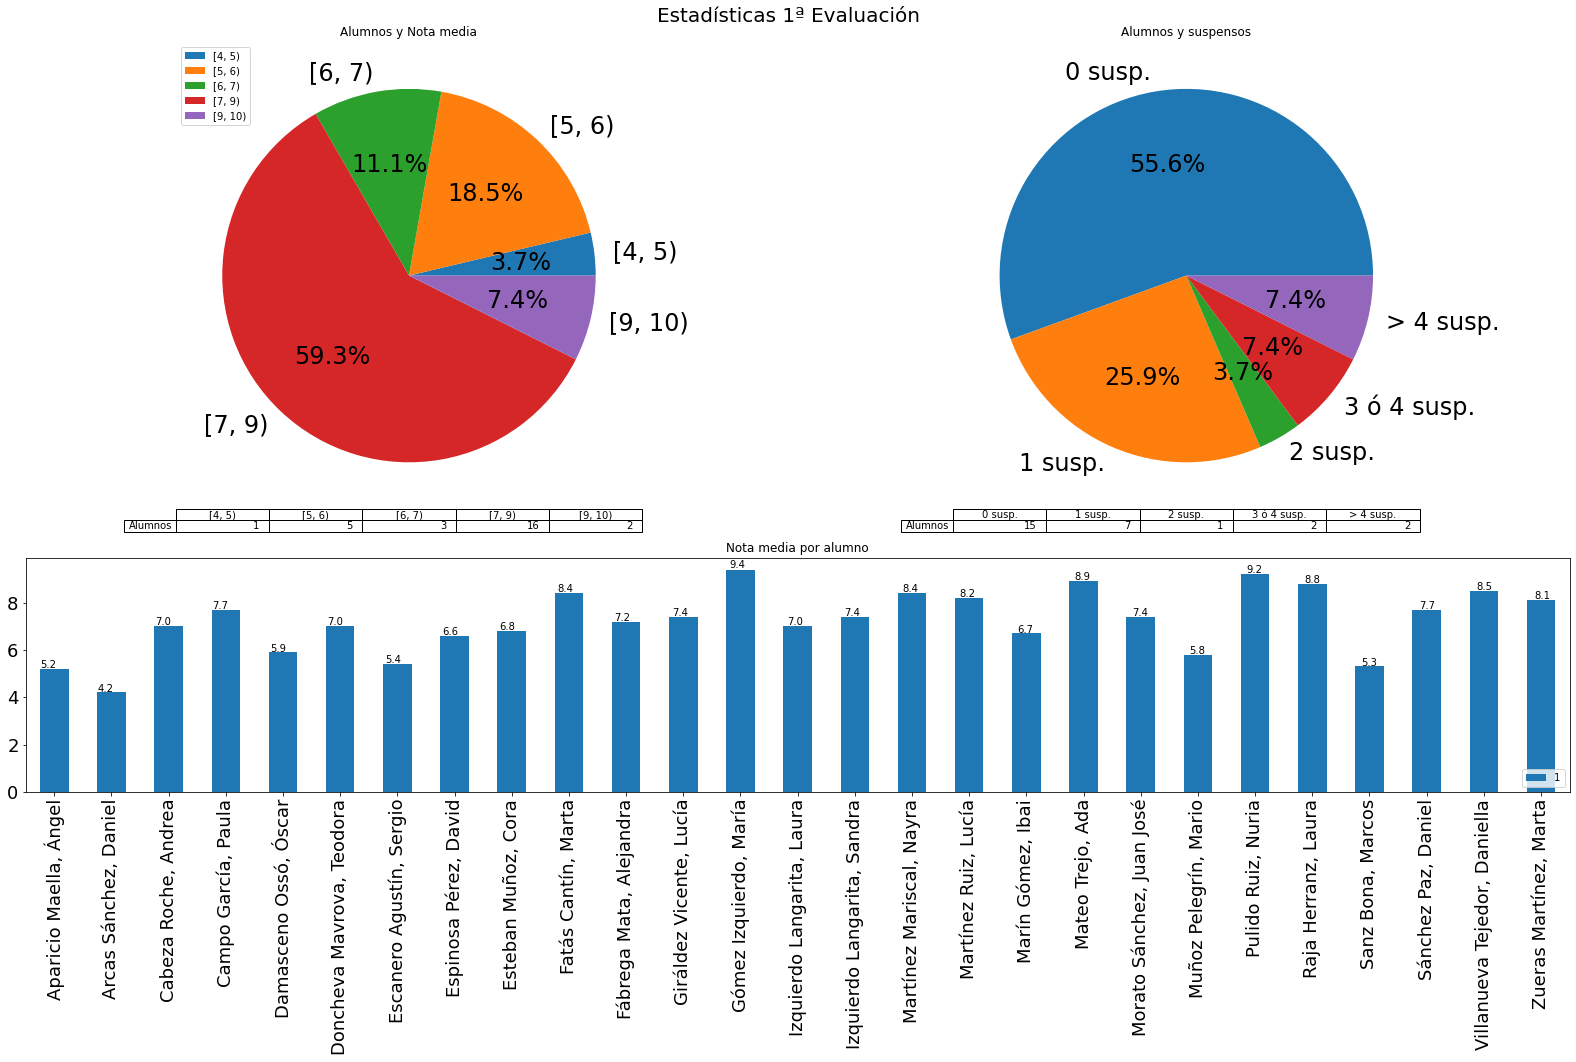

In [71]:
fig = plt.figure(figsize=(22,15))
fig.suptitle('Estadísticas {}ª Evaluación'.format(ultima_evaluacion), fontsize=20)
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[2, 1])

ax0 = fig.add_subplot(gs[1, :])
df=actilla_final.groupby(['Alumno','Eval'])[['Nota']].mean().round(2).rename(columns={'Nota':'Media'}).unstack()
df.columns = df.columns.get_level_values(1)
g3=df.plot.bar(title='Nota media por alumno',ax=ax0, xlabel="", fontsize=18)
g3.legend(loc='lower right')
for p in g3.patches:
    g3.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
        
ax1 = fig.add_subplot(gs[0, 0])
df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').mean().Nota
ranges = [0,3,4,5,6,7,9,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.name = 'Alumnos'
g1=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y Nota media',autopct='%1.1f%%', legend = True, table=True, ax=ax1, ylabel="", fontsize=24)
, fontsize=24
ax2 = fig.add_subplot(gs[0, 1])
df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').sum().Suspenso
ranges = [0,1,2,3,5,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.index=['0 susp.','1 susp.','2 susp.','3 ó 4 susp.','> 4 susp.']
df2.name = 'Alumnos'
g4=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y suspensos',autopct='%1.1f%%', table=True, ax=ax2, ylabel="", fontsize=24)

fig.savefig('resumen_{}ev.png'.format(ultima_evaluacion))

# Finalizamos informe resumen
#imgkit.from_string('<meta charset="UTF-8">'+actilla_estilada.render(),'actilla_{}.png'.format(ultima_evaluacion), options = {'format':'png','zoom':'1.2'})


#texto += "# Resultados de la {}ª evaluación \n\n".format(ultima_evaluacion)
texto2 += "![](actilla_{}ev.png)".format(ultima_evaluacion)
texto2 += "\\newpage"
texto2 += "\n \n ![](resumen_{}ev.png)".format(ultima_evaluacion)+" \n \n"
f2.write(texto2)
f2.close()

import pypandoc

pypandoc.convert_file("resumen_{}ev.md".format(ultima_evaluacion),'pdf',outputfile='resumen_{}ev.pdf'.format(ultima_evaluacion),extra_args=['--template=borrar.latex'])


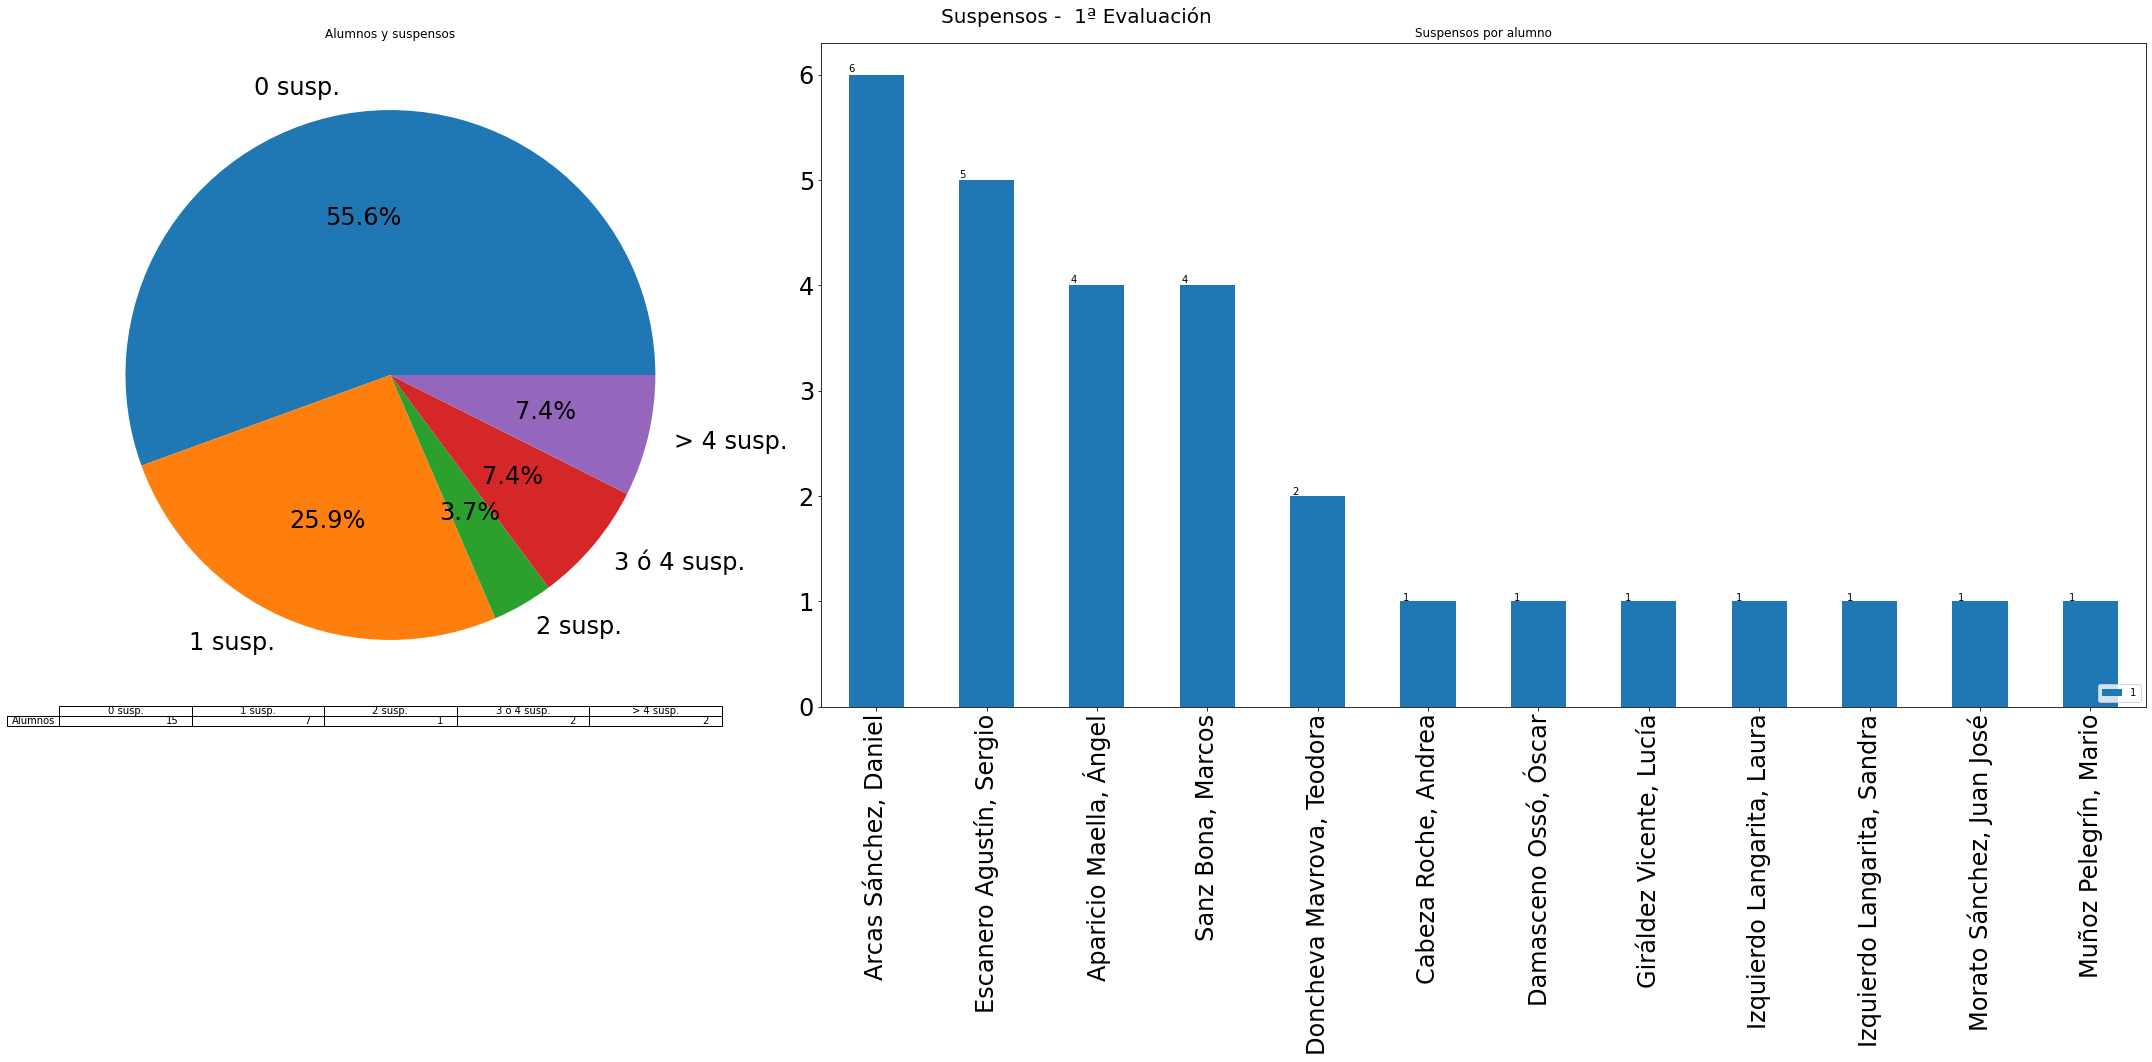

In [72]:
fig = plt.figure(figsize=(30,15))
fig.suptitle('Suspensos -  {}ª Evaluación'.format(ultima_evaluacion), fontsize=20)
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 2])

ax0 = fig.add_subplot(gs[0, 0])

df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').sum().Suspenso
ranges = [0,1,2,3,5,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.index=['0 susp.','1 susp.','2 susp.','3 ó 4 susp.','> 4 susp.']
df2.name = 'Alumnos'

g0=df2[df2>0].plot(kind='pie', title = 'Alumnos y suspensos',ax=ax0, autopct='%1.1f%%', table=True, ylabel="", fontsize=24)

ax1 = fig.add_subplot(gs[0, 1])

df=actilla_final.groupby(['Alumno','Eval'])[['Suspenso']].sum().round(2).rename(columns={'Suspenso':'Suspensos'}).unstack()
df.columns = df.columns.get_level_values(1)
g4=df[df[ultima_evaluacion] > 0].sort_values(ultima_evaluacion, ascending=False).plot.bar(title='Suspensos por alumno',ax=ax1, xlabel="", fontsize=24)
#g4=df.plot.bar(title='Suspensos por alumno', xlabel="", fontsize=18)
for p in g4.patches:
    g4.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
g4.legend(loc='lower right')    

fig.savefig('g3.png'.format(ultima_evaluacion))

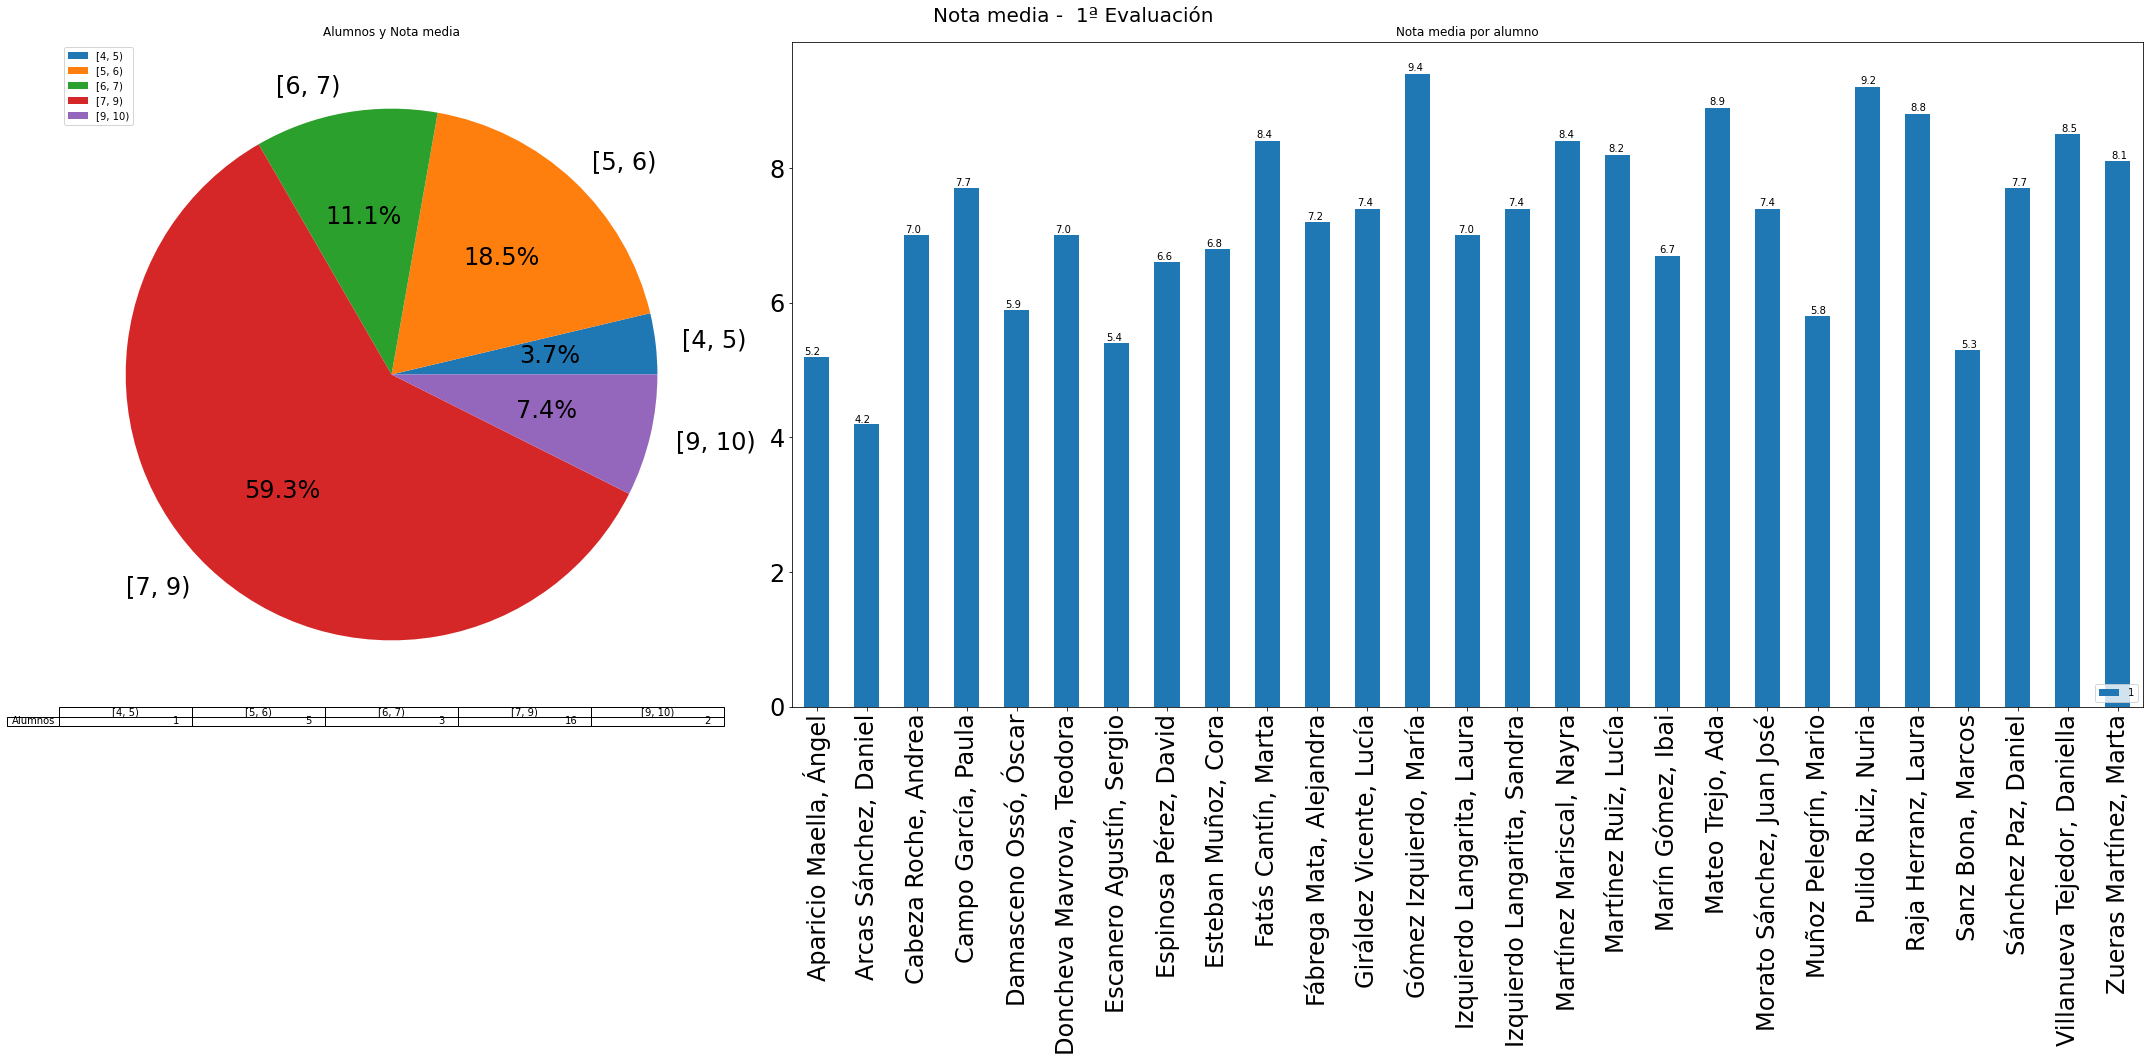

In [73]:
fig = plt.figure(figsize=(30,15))
fig.suptitle('Nota media -  {}ª Evaluación'.format(ultima_evaluacion), fontsize=20)
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 2])

ax0 = fig.add_subplot(gs[0, 0])

df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').mean().Nota
ranges = [0,3,4,5,6,7,9,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.name = "Alumnos"
g1=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y Nota media',autopct='%1.1f%%', legend = True, table=True, ylabel="", fontsize=24)

ax0 = fig.add_subplot(gs[0,1])
df=actilla_final.groupby(['Alumno','Eval'])[['Nota']].mean().round(2).rename(columns={'Nota':'Media'}).unstack()
df.columns = df.columns.get_level_values(1)
g3=df.plot.bar(title='Nota media por alumno',ax=ax0, xlabel="", fontsize=24)
g3.legend(loc='lower right')
for p in g3.patches:
    g3.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
   

fig.savefig('g4.png'.format(ultima_evaluacion))

,0 susp.,1 susp.,2 susp.,3 ó 4 susp.,> 4 susp.
Alumnos,15,7,1,2,2


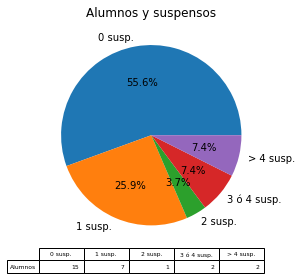

In [74]:
# Alumnos y suspensos

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').sum().Suspenso
ranges = [0,1,2,3,5,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.index=['0 susp.','1 susp.','2 susp.','3 ó 4 susp.','> 4 susp.']

df2.name = 'Alumnos'
#df2.name = ultima_evaluacion

g0=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y suspensos',autopct='%1.1f%%', table=True, ylabel="")
g0
g0.get_figure().savefig('g0.png')

# texto += "\n\n### Resumen de suspensos \n"
# texto += "\n \n {} \n".format(df2.to_frame().T.to_markdown())

texto +=analisis_df(df2.to_frame().T.rename({'Alumnos':ultima_evaluacion}),txt_intro="El número de alumnos por suspensos se distribuyen de la siguiente manera: \n", modo=2)[0]
texto += "\n \n Gráficamente: \n \n ![](g3.png) \n \n"

df2.to_frame().T



In [75]:
# Alumno-Asignatura-Suspenso
df = actilla_final[(actilla_final.Eval == ultima_evaluacion) & (actilla_final.Suspenso >= 0)][['Alumno','Asignatura','Suspenso']]

# Alumno-Suspenso
df2=df.groupby('Alumno').sum().sort_values('Suspenso', ascending=False)

# Numero Suspenso - Numero alumnos
df3 = df2
df3['N']=1
df3 = df3.groupby('Suspenso').count().sort_index(ascending=False)

display("Alumnos suspensos: \n")

texto += " \n Alumnos con suspensos: \n"
for i in df3[df3.index> 0].index :
    print(f'Con **{i}** asignatura:')
    texto += "\n* Con **{}** asignaturas: \n".format(i)
    for j in df2[df2.Suspenso == i].sort_values('Alumno').index : 
        print(" ", j,'(', ', '.join(df[(df.Alumno == j) & (df.Suspenso > 0)]['Asignatura'].values),')')
        texto += "\n    - "+ j+' ('+ ', '.join(df[(df.Alumno == j) & (df.Suspenso > 0)]['Asignatura'].values)+") \n \n"


'Alumnos suspensos: \n'

Con **6** asignatura:
  Arcas Sánchez, Daniel ( GH 4º, IN 4º, CCL 4º, FQ 4º, LE 4º, MC 4º )
Con **5** asignatura:
  Escanero Agustín, Sergio ( BG 4º, TIC 4º, GHB 4º, MC 4º, LE 4º )
Con **4** asignatura:
  Aparicio Maella, Ángel ( LE 4º, TC 4º, TIC 4º, FQ 4º )
  Sanz Bona, Marcos ( BG 4º, FQ 4º, MC 4º, LE 4º )
Con **2** asignatura:
  Doncheva Mavrova, Teodora ( GHB 4º, MC 4º )
Con **1** asignatura:
  Cabeza Roche, Andrea ( GHB 4º )
  Damasceno Ossó, Óscar ( TIC 4º )
  Giráldez Vicente, Lucía ( TIC 4º )
  Izquierdo Langarita, Laura ( MC 4º )
  Izquierdo Langarita, Sandra ( MC 4º )
  Morato Sánchez, Juan José ( MC 4º )
  Muñoz Pelegrín, Mario ( MC 4º )


Nota,"[0, 3)","[3, 4)","[4, 5)","[5, 6)","[6, 7)","[7, 9)","[9, 10)"
Alumnos,0,0,1,5,3,16,2


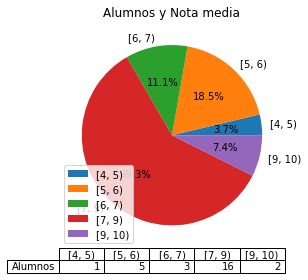

In [76]:
# Alumnos y nota media
df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').mean().Nota
ranges = [0,3,4,5,6,7,9,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.name = "Alumnos"
g1=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y Nota media',autopct='%1.1f%%', legend = True, table=True, ylabel="")
g1
g1.get_figure().savefig('g1.png')

# texto += "\n\n### Resumen de nota media \n"
# texto += "\n {} \n".format(df2.to_frame().T.to_markdown())

texto +=analisis_df(df2.to_frame().T.rename({'Alumnos':ultima_evaluacion}),txt_intro="El número de alumnos por nota media se distribuye de la siguiente manera: \n", modo=2)[0]
texto += "\n\n Gráficamente \n \n ![](g4.png) \n \n"

df2.to_frame().T



Eval,1
Alumno,
"Aparicio Maella, Ángel",5.2
"Arcas Sánchez, Daniel",4.2
"Cabeza Roche, Andrea",7.0
"Campo García, Paula",7.7
"Damasceno Ossó, Óscar",5.9
"Doncheva Mavrova, Teodora",7.0
"Escanero Agustín, Sergio",5.4
"Espinosa Pérez, David",6.6
"Esteban Muñoz, Cora",6.8


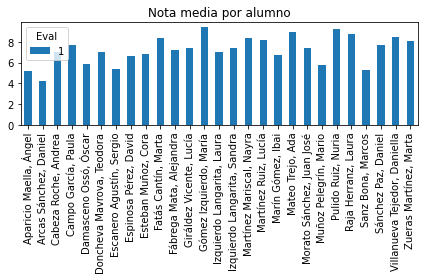

In [77]:
df=actilla_final.groupby(['Alumno','Eval'])[['Nota']].mean().round(2).rename(columns={'Nota':'Media'}).unstack()
df.columns = df.columns.get_level_values(1)
g2=df.plot.bar(title='Nota media por alumno', xlabel ="") 
g2
g2.get_figure().savefig('g2.png')

texto += "\n\n## Resultados por alumno \n\n"
# texto += "\n\n### Notas medias \n\n"
# texto += " {} ".format(df.to_markdown())
# texto += "\n\n ![](g2.png) \n \n"

df

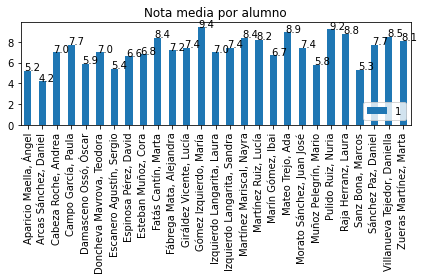

In [78]:
g2 = df.plot(kind='bar', title='Nota media por alumno', xlabel ="")
g2.legend(loc='lower right')

for p in g2.patches:
    g2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

g2.get_figure().savefig('g2.png')

In [79]:
# Resultados por alumno

observaciones = True

texto3 = texto

df = actilla_final[actilla_final.Eval <= ultima_evaluacion]

#texto += "\n\n### Resultados por alumno \n"
for a in df.groupby('Alumno').nunique().index :
    
    #Resumen de resultados
    df2 = df[(df.Alumno == a) & (df.Eval <= ultima_evaluacion)].groupby(['Alumno','Eval']).aggregate({'Nota':'mean','Suspenso':'sum'})
    df2.index = df2.index.get_level_values(1)
    df2.Nota = df2.Nota.round(2)
    df2 = df2.rename(columns={'Nota':'Nota media', 'Suspenso':'Número de suspensos'})
    display(analisis_df(df2, "En la {}ªev: \n ".format(ultima_evaluacion),txt_igual="\n * Mantiene {}")[0])
    txt = "\n\n### {} \n".format(a)
    #texto += "\n {} \n".format(analisis_df(df2, " {} en la {}ªev: \n ".format(a,ultima_evaluacion),txt_igual="\n * Mantiene {}")[0])
    txt += "\n * {}".format(analisis_df(df2, "",txt_igual="\n * Mantiene {}", modo=3)[0])
    texto += txt
    texto3 += txt
    
    #Lista de suspensos
    df2 = df[(df.Alumno==a) & (df.Suspenso==1) & (df.Eval == ultima_evaluacion)][['Asignatura','Eval','Suspenso']]
    if len(df2[['Asignatura']].values) > 0 : 
        #txt="* Suspende {} asignaturas: ".format(len(df2[['Asignatura']].values)) + ", ".join([i[0] for i in df2[['Asignatura']].values])
        txt="* Suspensos: " + ", ".join([i[0] for i in df2[['Asignatura']].values])
        texto += "\n\n{} \n".format(txt)
        texto3 += "\n\n{} \n".format(txt)
        print(txt) 

    
    #Análisis de las notas
    df2 = df[(df.Alumno == a) & (df.Eval <= ultima_evaluacion)].iloc[:,1:-1].groupby(['Asignatura','Eval']).min().unstack('Asignatura')
    df2.columns = df2.columns.get_level_values(1)
    display(df2)
    display(analisis_df(df2, "Resultados: \n ", "Sube en {}:", "Baja en {}:", "En {}:", solo_diferencias=True)[0])
    texto += "\n{}\n".format(df2.to_markdown())
    txt =  analisis_df(df2, "\n\n * Resultados: ", "Sube en {}:", "**Baja** en {}:", "En {}:", solo_diferencias=True, modo=3)[0]
    texto +=  txt
    texto3 += txt
    
    if (observaciones & obser.Observaciones[obser.Alumno == a].count() > 0) : 
        display(obser.Observaciones[obser.Alumno == a].values[0])
        txt =  "\n\n * Observaciones: {}".format(obser.Observaciones[obser.Alumno == a].values[0])
        texto += txt
        texto3 += txt
texto = texto.replace('|--','|:-').replace('--|','-:|')
f.write(texto)
f.close()

f3.write(texto3)
f3.close()



pypandoc.convert_file("acta_{}ev.md".format(ultima_evaluacion),'pdf',outputfile='acta_{}ev.pdf'.format(ultima_evaluacion),extra_args=['--template=borrar.latex'])
pypandoc.convert_file("acta2_{}ev.md".format(ultima_evaluacion),'docx',outputfile='acta_{}ev.docx'.format(ultima_evaluacion))

'En la 1ªev: \n **Nota media** es 5.2, **Número de suspensos** es 4 \n '

* Suspensos: LE 4º, TC 4º, TIC 4º, FQ 4º


Asignatura,EC 4º,EF 4º,FQ 4º,GH 4º,IN 4º,LE 4º,MC 4º,TC 4º,TIC 4º,VET 4º
Eval,,,,,,,,,,
1,5,6,4,5,6,4,5,4,4,9


'Resultados: \n **EC 4º** es 5, **EF 4º** es 6, **FQ 4º** es 4, **GH 4º** es 5, **IN 4º** es 6, **LE 4º** es 4, **MC 4º** es 5, **TC 4º** es 4, **TIC 4º** es 4, **VET 4º** es 9 \n '

'Alumno poco trabajador, y además justo. No se tiene que descuidar'

'En la 1ªev: \n **Nota media** es 4.2, **Número de suspensos** es 6 \n '

* Suspensos: GH 4º, IN 4º, CCL 4º, FQ 4º, LE 4º, MC 4º


Asignatura,CCL 4º,EC 4º,EF 4º,FQ 4º,GH 4º,IN 4º,LE 4º,MC 4º,TC 4º,VET 4º
Eval,,,,,,,,,,
1,4,5,7,3,2,3,3,2,5,8


'Resultados: \n **CCL 4º** es 4, **EC 4º** es 5, **EF 4º** es 7, **FQ 4º** es 3, **GH 4º** es 2, **IN 4º** es 3, **LE 4º** es 3, **MC 4º** es 2, **TC 4º** es 5, **VET 4º** es 8 \n '

'Alumno con muchas dificultades que ha rechazado derivaciones en otras ocasiones.  En el grupo e itinerario actual lo tiene muy complicado'

'En la 1ªev: \n **Nota media** es 7, **Número de suspensos** es 1 \n '

* Suspensos: GHB 4º


Asignatura,ARE 4º,BG 4º,EF 4º,FQB 4º,FR2 4º,GHB 4º,INB 4º,LE 4º,MC 4º,VET 4º
Eval,,,,,,,,,,
1,8,9,8,6,7,4,7,7,6,8


'Resultados: \n **ARE 4º** es 8, **BG 4º** es 9, **EF 4º** es 8, **FQB 4º** es 6, **FR2 4º** es 7, **GHB 4º** es 4, **INB 4º** es 7, **LE 4º** es 7, **MC 4º** es 6, **VET 4º** es 8 \n '

'Si mejora el trabajo en casa, posiblemente mejore los resultados. Se ha dejado tareas para casa sin entregar (LE, MA, GHB)'

'En la 1ªev: \n **Nota media** es 7.7, **Número de suspensos** es 0 \n '

Asignatura,ARE 4º,BG 4º,EF 4º,FQB 4º,FR2 4º,GHB 4º,INB 4º,LE 4º,MC 4º,VET 4º
Eval,,,,,,,,,,
1,8,7,8,8,8,8,8,8,6,8


'Resultados: \n **ARE 4º** es 8, **BG 4º** es 7, **EF 4º** es 8, **FQB 4º** es 8, **FR2 4º** es 8, **GHB 4º** es 8, **INB 4º** es 8, **LE 4º** es 8, **MC 4º** es 6, **VET 4º** es 8 \n '

'Bastante trabajadora. En algunas asignaturas participa menos (MA, FQ) sin embargo en otras está más activa (ARE, Fr)'

'En la 1ªev: \n **Nota media** es 5.9, **Número de suspensos** es 1 \n '

* Suspensos: TIC 4º


Asignatura,EC 4º,EF 4º,FQ 4º,GH 4º,IN 4º,LE 4º,MC 4º,PL 4º,RC 4º,TIC 4º
Eval,,,,,,,,,,
1,8,5,6,6,6,6,5,7,6,4


'Resultados: \n **EC 4º** es 8, **EF 4º** es 5, **FQ 4º** es 6, **GH 4º** es 6, **IN 4º** es 6, **LE 4º** es 6, **MC 4º** es 5, **PL 4º** es 7, **RC 4º** es 6, **TIC 4º** es 4 \n '

'Ha trabajado más o menos bien, pero no se puede descuidar con las notas que tiene'

'En la 1ªev: \n **Nota media** es 7, **Número de suspensos** es 2 \n '

* Suspensos: GHB 4º, MC 4º


Asignatura,BG 4º,CC 4º,EF 4º,FQB 4º,GHB 4º,INB 4º,LE 4º,MC 4º,MU 4º,VET 4º
Eval,,,,,,,,,,
1,7,8,7,8,4,9,6,4,9,8


'Resultados: \n **BG 4º** es 7, **CC 4º** es 8, **EF 4º** es 7, **FQB 4º** es 8, **GHB 4º** es 4, **INB 4º** es 9, **LE 4º** es 6, **MC 4º** es 4, **MU 4º** es 9, **VET 4º** es 8 \n '

'Falta de trabajo sobre todo en casa. Debe cuidar este aspecto para llevar el curso al día, ya que es capaz'

'En la 1ªev: \n **Nota media** es 5.4, **Número de suspensos** es 5 \n '

* Suspensos: BG 4º, TIC 4º, GHB 4º, MC 4º, LE 4º


Asignatura,BG 4º,EF 4º,FQB 4º,GHB 4º,INB 4º,LE 4º,MC 4º,MU 4º,RC 4º,TIC 4º
Eval,,,,,,,,,,
1,4,7,6,4,6,4,4,8,8,3


'Resultados: \n **BG 4º** es 4, **EF 4º** es 7, **FQB 4º** es 6, **GHB 4º** es 4, **INB 4º** es 6, **LE 4º** es 4, **MC 4º** es 4, **MU 4º** es 8, **RC 4º** es 8, **TIC 4º** es 3 \n '

'Tiene que trabajar más si no quiere tener problemas a final de curso'

'En la 1ªev: \n **Nota media** es 6.6, **Número de suspensos** es 0 \n '

Asignatura,ECB 4º,EF 4º,FQ 4º,GHB 4º,INB 4º,LE 4º,MC 4º,TC 4º,TIC 4º,VET 4º
Eval,,,,,,,,,,
1,9,8,5,5,7,5,5,7,7,8


'Resultados: \n **ECB 4º** es 9, **EF 4º** es 8, **FQ 4º** es 5, **GHB 4º** es 5, **INB 4º** es 7, **LE 4º** es 5, **MC 4º** es 5, **TC 4º** es 7, **TIC 4º** es 7, **VET 4º** es 8 \n '

'Alumno capaz, pero con falta de trabajo. Piensa que con atender es suficiente, necesita trabajar más para consolidar el conocimiento.'

'En la 1ªev: \n **Nota media** es 6.8, **Número de suspensos** es 0 \n '

Asignatura,ECB 4º,EF 4º,FQ 4º,GHB 4º,INB 4º,LE 4º,MC 4º,TC 4º,TIC 4º,VET 4º
Eval,,,,,,,,,,
1,6,6,7,7,8,7,5,7,7,8


'Resultados: \n **ECB 4º** es 6, **EF 4º** es 6, **FQ 4º** es 7, **GHB 4º** es 7, **INB 4º** es 8, **LE 4º** es 7, **MC 4º** es 5, **TC 4º** es 7, **TIC 4º** es 7, **VET 4º** es 8 \n '

'Buena actitud y trabajo. Parece que va ganando en confianza'

'En la 1ªev: \n **Nota media** es 8.4, **Número de suspensos** es 0 \n '

Asignatura,BG 4º,EF 4º,FQB 4º,FR2 4º,GHB 4º,INB 4º,LE 4º,MC 4º,RC 4º,TIC 4º
Eval,,,,,,,,,,
1,9,9,8,9,8,8,8,8,8,9


'Resultados: \n **BG 4º** es 9, **EF 4º** es 9, **FQB 4º** es 8, **FR2 4º** es 9, **GHB 4º** es 8, **INB 4º** es 8, **LE 4º** es 8, **MC 4º** es 8, **RC 4º** es 8, **TIC 4º** es 9 \n '

'Alumna participativa. En ocasiones tiene altibajos en su rendimiento (MC, FQ)'

'En la 1ªev: \n **Nota media** es 7.2, **Número de suspensos** es 0 \n '

Asignatura,BG 4º,EF 4º,FQB 4º,GHB 4º,INB 4º,LE 4º,MC 4º,RC 4º,TC 4º,TIC 4º
Eval,,,,,,,,,,
1,7,8,7,7,8,7,5,8,8,7


'Resultados: \n **BG 4º** es 7, **EF 4º** es 8, **FQB 4º** es 7, **GHB 4º** es 7, **INB 4º** es 8, **LE 4º** es 7, **MC 4º** es 5, **RC 4º** es 8, **TC 4º** es 8, **TIC 4º** es 7 \n '

'Bien. Aunque empezó algo perdida al final ha mejorado'

'En la 1ªev: \n **Nota media** es 7.4, **Número de suspensos** es 1 \n '

* Suspensos: TIC 4º


Asignatura,BG 4º,EF 4º,FQB 4º,FR2 4º,GHB 4º,INB 4º,LE 4º,MC 4º,RC 4º,TIC 4º
Eval,,,,,,,,,,
1,7,8,8,9,9,7,7,6,9,4


'Resultados: \n **BG 4º** es 7, **EF 4º** es 8, **FQB 4º** es 8, **FR2 4º** es 9, **GHB 4º** es 9, **INB 4º** es 7, **LE 4º** es 7, **MC 4º** es 6, **RC 4º** es 9, **TIC 4º** es 4 \n '

'Muy participativa y trabajadora. Por lo visto, está bastante más centrada que otros cursos'

'En la 1ªev: \n **Nota media** es 9.4, **Número de suspensos** es 0 \n '

Asignatura,BG 4º,EF 4º,FIL 4º,FQB 4º,FR2 4º,GHB 4º,INB 4º,LE 4º,MC 4º,RC 4º
Eval,,,,,,,,,,
1,10,9,10,10,9,10,9,9,9,9


'Resultados: \n **BG 4º** es 10, **EF 4º** es 9, **FIL 4º** es 10, **FQB 4º** es 10, **FR2 4º** es 9, **GHB 4º** es 10, **INB 4º** es 9, **LE 4º** es 9, **MC 4º** es 9, **RC 4º** es 9 \n '

'Muy bien. Por poner un "pero" que sea más participativa'

'En la 1ªev: \n **Nota media** es 7, **Número de suspensos** es 1 \n '

* Suspensos: MC 4º


Asignatura,BG 4º,CC 4º,EF 4º,FQB 4º,FR2 4º,GHB 4º,INB 4º,LE 4º,MC 4º,RC 4º
Eval,,,,,,,,,,
1,7,9,6,7,7,8,8,7,4,7


'Resultados: \n **BG 4º** es 7, **CC 4º** es 9, **EF 4º** es 6, **FQB 4º** es 7, **FR2 4º** es 7, **GHB 4º** es 8, **INB 4º** es 8, **LE 4º** es 7, **MC 4º** es 4, **RC 4º** es 7 \n '

'Bien, trabajadora. Ciertas dificultades con MC y FQ'

'En la 1ªev: \n **Nota media** es 7.4, **Número de suspensos** es 1 \n '

* Suspensos: MC 4º


Asignatura,BG 4º,CC 4º,EF 4º,FQB 4º,FR2 4º,GHB 4º,INB 4º,LE 4º,MC 4º,RC 4º
Eval,,,,,,,,,,
1,7,9,9,7,8,7,8,7,4,8


'Resultados: \n **BG 4º** es 7, **CC 4º** es 9, **EF 4º** es 9, **FQB 4º** es 7, **FR2 4º** es 8, **GHB 4º** es 7, **INB 4º** es 8, **LE 4º** es 7, **MC 4º** es 4, **RC 4º** es 8 \n '

'Bien, trabajadora. Ciertas dificultades con MC y FQ'

'En la 1ªev: \n **Nota media** es 8.4, **Número de suspensos** es 0 \n '

Asignatura,BG 4º,EF 4º,FQB 4º,FR2 4º,GHB 4º,INB 4º,LE 4º,MC 4º,TIC 4º,VET 4º
Eval,,,,,,,,,,
1,8,9,9,9,8,7,9,8,8,9


'Resultados: \n **BG 4º** es 8, **EF 4º** es 9, **FQB 4º** es 9, **FR2 4º** es 9, **GHB 4º** es 8, **INB 4º** es 7, **LE 4º** es 9, **MC 4º** es 8, **TIC 4º** es 8, **VET 4º** es 9 \n '

'Buena actitud y trabajadora'

'En la 1ªev: \n **Nota media** es 8.2, **Número de suspensos** es 0 \n '

Asignatura,ECB 4º,EF 4º,FQ 4º,GHB 4º,INB 4º,LE 4º,MC 4º,TC 4º,TIC 4º,VET 4º
Eval,,,,,,,,,,
1,9,9,7,6,8,9,6,10,9,9


'Resultados: \n **ECB 4º** es 9, **EF 4º** es 9, **FQ 4º** es 7, **GHB 4º** es 6, **INB 4º** es 8, **LE 4º** es 9, **MC 4º** es 6, **TC 4º** es 10, **TIC 4º** es 9, **VET 4º** es 9 \n '

'Muy buena actitud y trabajadora'

'En la 1ªev: \n **Nota media** es 6.7, **Número de suspensos** es 0 \n '

Asignatura,EC 4º,EF 4º,FIL 4º,FQ 4º,GH 4º,IN 4º,LE 4º,MC 4º,MU 4º,RC 4º
Eval,,,,,,,,,,
1,7,6,6,5,7,6,7,8,8,7


'Resultados: \n **EC 4º** es 7, **EF 4º** es 6, **FIL 4º** es 6, **FQ 4º** es 5, **GH 4º** es 7, **IN 4º** es 6, **LE 4º** es 7, **MC 4º** es 8, **MU 4º** es 8, **RC 4º** es 7 \n '

'Buena actitud y trabajo en general'

'En la 1ªev: \n **Nota media** es 8.9, **Número de suspensos** es 0 \n '

Asignatura,BG 4º,EF 4º,FQB 4º,GHB 4º,INB 4º,LE 4º,MC 4º,TC 4º,TIC 4º,VET 4º
Eval,,,,,,,,,,
1,9,9,9,10,9,9,8,8,10,8


'Resultados: \n **BG 4º** es 9, **EF 4º** es 9, **FQB 4º** es 9, **GHB 4º** es 10, **INB 4º** es 9, **LE 4º** es 9, **MC 4º** es 8, **TC 4º** es 8, **TIC 4º** es 10, **VET 4º** es 8 \n '

'Muy buen trabajo y actitud'

'En la 1ªev: \n **Nota media** es 7.4, **Número de suspensos** es 1 \n '

* Suspensos: MC 4º


Asignatura,ECB 4º,EF 4º,FQ 4º,FR2 4º,GHB 4º,INB 4º,LE 4º,MC 4º,TIC 4º,VET 4º
Eval,,,,,,,,,,
1,9,9,7,7,7,9,6,4,9,7


'Resultados: \n **ECB 4º** es 9, **EF 4º** es 9, **FQ 4º** es 7, **FR2 4º** es 7, **GHB 4º** es 7, **INB 4º** es 9, **LE 4º** es 6, **MC 4º** es 4, **TIC 4º** es 9, **VET 4º** es 7 \n '

'En algunas asignaturas (EC) es muy participativo, en otras pasa más desapercibido. A veces es desordenado y caótico'

'En la 1ªev: \n **Nota media** es 5.8, **Número de suspensos** es 1 \n '

* Suspensos: MC 4º


Asignatura,EC 4º,EF 4º,FQ 4º,GH 4º,IN 4º,LE 4º,MC 4º,RC 4º,TC 4º,TIC 4º
Eval,,,,,,,,,,
1,7,6,5,5,5,6,4,7,6,7


'Resultados: \n **EC 4º** es 7, **EF 4º** es 6, **FQ 4º** es 5, **GH 4º** es 5, **IN 4º** es 5, **LE 4º** es 6, **MC 4º** es 4, **RC 4º** es 7, **TC 4º** es 6, **TIC 4º** es 7 \n '

'Ha mejorado al final del trimestre. Tiene que organizarse mejor, sobre todo con el trabajo de casa'

'En la 1ªev: \n **Nota media** es 9.2, **Número de suspensos** es 0 \n '

Asignatura,ARE 4º,ECB 4º,EF 4º,FQ 4º,FR2 4º,GHB 4º,INB 4º,LE 4º,MC 4º,RC 4º
Eval,,,,,,,,,,
1,8,9,9,9,10,10,9,10,10,8


'Resultados: \n **ARE 4º** es 8, **ECB 4º** es 9, **EF 4º** es 9, **FQ 4º** es 9, **FR2 4º** es 10, **GHB 4º** es 10, **INB 4º** es 9, **LE 4º** es 10, **MC 4º** es 10, **RC 4º** es 8 \n '

'Muy bien.'

'En la 1ªev: \n **Nota media** es 8.8, **Número de suspensos** es 0 \n '

Asignatura,ARE 4º,BG 4º,EF 4º,FQB 4º,FR2 4º,GHB 4º,INB 4º,LE 4º,MC 4º,VET 4º
Eval,,,,,,,,,,
1,8,9,9,10,9,9,9,9,8,8


'Resultados: \n **ARE 4º** es 8, **BG 4º** es 9, **EF 4º** es 9, **FQB 4º** es 10, **FR2 4º** es 9, **GHB 4º** es 9, **INB 4º** es 9, **LE 4º** es 9, **MC 4º** es 8, **VET 4º** es 8 \n '

'Muy bien, aunque a veces es demasiado exigente con ella misma. Debe aprender a gestionar esa presión'

'En la 1ªev: \n **Nota media** es 5.3, **Número de suspensos** es 4 \n '

* Suspensos: BG 4º, FQ 4º, MC 4º, LE 4º


Asignatura,BG 4º,CC 4º,EF 4º,FQ 4º,GH 4º,IN 4º,LE 4º,MC 4º,RC 4º,TC 4º
Eval,,,,,,,,,,
1,4,7,7,4,6,8,4,2,6,5


'Resultados: \n **BG 4º** es 4, **CC 4º** es 7, **EF 4º** es 7, **FQ 4º** es 4, **GH 4º** es 6, **IN 4º** es 8, **LE 4º** es 4, **MC 4º** es 2, **RC 4º** es 6, **TC 4º** es 5 \n '

'Pese a los malos resultados, parece que esta mejor que el año pasado. No obstante, todavía tiene que mejorar bastante si no quiere tener problemas.'

'En la 1ªev: \n **Nota media** es 7.7, **Número de suspensos** es 0 \n '

Asignatura,EC 4º,EF 4º,FQ 4º,GH 4º,IN 4º,LE 4º,MC 4º,RC 4º,TC 4º,TIC 4º
Eval,,,,,,,,,,
1,9,6,6,8,7,8,9,7,9,8


'Resultados: \n **EC 4º** es 9, **EF 4º** es 6, **FQ 4º** es 6, **GH 4º** es 8, **IN 4º** es 7, **LE 4º** es 8, **MC 4º** es 9, **RC 4º** es 7, **TC 4º** es 9, **TIC 4º** es 8 \n '

'Muy buena actitud y trabajo'

'En la 1ªev: \n **Nota media** es 8.5, **Número de suspensos** es 0 \n '

Asignatura,BG 4º,EF 4º,FQB 4º,GHB 4º,INB 4º,LE 4º,MC 4º,PL 4º,TIC 4º,VET 4º
Eval,,,,,,,,,,
1,8,9,9,8,9,8,6,10,9,9


'Resultados: \n **BG 4º** es 8, **EF 4º** es 9, **FQB 4º** es 9, **GHB 4º** es 8, **INB 4º** es 9, **LE 4º** es 8, **MC 4º** es 6, **PL 4º** es 10, **TIC 4º** es 9, **VET 4º** es 9 \n '

'Buena actitud y trabajo, a veces va un poco a remolque. La situación familiar que ha pasado tampoco le ha ayudado mucho.'

'En la 1ªev: \n **Nota media** es 8.1, **Número de suspensos** es 0 \n '

Asignatura,ARE 4º,BG 4º,EF 4º,FQB 4º,FR2 4º,GHB 4º,INB 4º,LE 4º,MC 4º,VET 4º
Eval,,,,,,,,,,
1,8,8,9,8,9,8,8,9,6,8


'Resultados: \n **ARE 4º** es 8, **BG 4º** es 8, **EF 4º** es 9, **FQB 4º** es 8, **FR2 4º** es 9, **GHB 4º** es 8, **INB 4º** es 8, **LE 4º** es 9, **MC 4º** es 6, **VET 4º** es 8 \n '

'Buena actitud y trabajo en general'

''

In [82]:
# profesores= [Alfonso Alegre Val,
# Carlos Rodriguez Jaso,
# Cecilia Alcaine Laguna,
# Diego Carmona Balfagon,
# Emma Isabel Tormes Sancho,
# Erika Lamarca Sebastian,
# Inés Povar Echevarría,
# Jesus Liso Lasilla,
# Juan Martin Estevez,
# Laura Roldan Muñoz,
# Lina F. De La Fuente Cano,
# M.Margarita Mateos Sancho,
# Maria Ester Nevado Pelaez,
# Natalia Ochoa Garces,
# Rafael Nuño Rivero,
# Raquel Ferrero Campo,
# Rodrigo Hinojosa Ros,
# Rosario Gerente Aina,
# Sara Sanchez Gracia,
# Sergio Ezquerra Marin,
# Susana Martinez Lera,
# Daniel Lerín Cristobal,
# Ivan Romero Catalan,
# Mª Pilar Lorente Longares,
# Oscar Ibor Marcuello,
# Rebeca Tristan Esteban]

profesores= ['Alfonso Alegre Val',
'Carlos Rodríguez Jaso (Tutor)',
'Cecilia Alcaine Laguna',
'Diego Carmona Balfagón',
'Emma Isabel Tormes Sancho',
'Inés Povar Echevarría',
'Jesús Liso Lasilla',
'Juan Martín Estévez',
'Laura Roldán Muñoz',
'Lina F. De La Fuente Cano',
'M.Margarita Mateos Sancho',
'María Ester Nevado Pelaez',
'Raquel Ferrero Campo',
'Rosario Gerente Aina',
'Sara Sanchez Gracia',
'Sergio Ezquerra Marín',
'Susana Martínez Lera',
'Daniel Lerín Cristóbal',
'Mª Pilar Lorente Longares',
'Óscar Ibor Marcuello',
'Rebeca Tristán Esteban',]

", ".join(profesores)

'Alfonso Alegre Val, Carlos Rodríguez Jaso (Tutor), Cecilia Alcaine Laguna, Diego Carmona Balfagón, Emma Isabel Tormes Sancho, Inés Povar Echevarría, Jesús Liso Lasilla, Juan Martín Estévez, Laura Roldán Muñoz, Lina F. De La Fuente Cano, M.Margarita Mateos Sancho, María Ester Nevado Pelaez, Raquel Ferrero Campo, Rosario Gerente Aina, Sara Sanchez Gracia, Sergio Ezquerra Marín, Susana Martínez Lera, Daniel Lerín Cristóbal, Mª Pilar Lorente Longares, Óscar Ibor Marcuello, Rebeca Tristán Esteban'